In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#run the command to make matplotlib charts inline in the notebook
%matplotlib inline

In [20]:
house=pd.read_csv('USA_Housing.csv')
house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [21]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [22]:
house.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [23]:
house.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


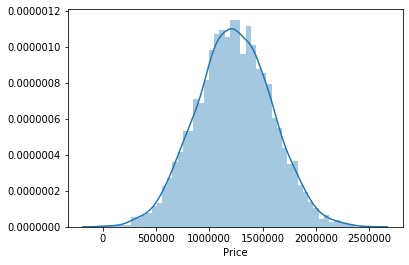

In [24]:
sns.distplot(house['Price'],bins=50)

In [25]:
from sklearn.model_selection import train_test_split
x=house[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]

In [27]:
y=house['Price']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

In [32]:
lr=LinearRegression()

In [40]:
#train the model
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
predictions=lr.predict(x_test)

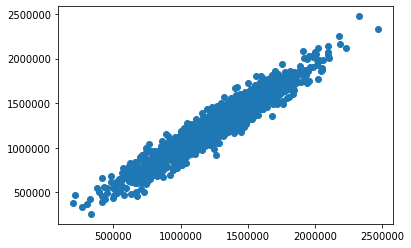

In [37]:
plt.scatter(y_test,predictions)

In [42]:
df=pd.DataFrame({'Actual':y_test,'Predicted':predictions})
df.head()

,Actual,Predicted
1501,1.339096e+06,1.308500e+06
2586,1.251794e+06,1.236863e+06
2653,1.340095e+06,1.244411e+06
1055,1.431508e+06,1.228858e+06
705,1.042374e+06,1.061128e+06


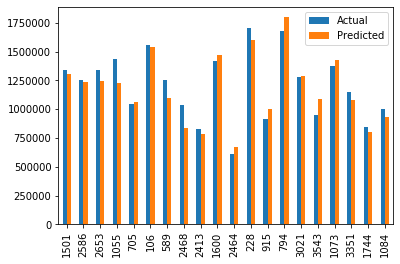

In [43]:
df.head(20).plot.bar()

In [47]:
#predict one case
lr.predict([x_test.iloc[25]])

array([1131411.26330386])

In [48]:
y_test.iloc[25]

1158742.8299392913

In [53]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,predictions)

80859.62543688527

In [55]:
nba=pd.read_excel('NBA_Players_2017.xlsx',index_col=0)
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,PPG,RPG,APG,BPG
Column1,,,,,,,,,,,,,,,,,,,,,
24096,2017,Alex Abrines,SG,23,OKC,68,6,1055,10.1,0.560,...,40,37,8,33,114,406,5.970588,1.264706,0.588235,0.117647
24097,2017,Quincy Acy,PF,26,TOT,38,1,558,11.8,0.565,...,18,14,15,21,67,222,5.842105,3.026316,0.473684,0.394737
24098,2017,Quincy Acy,PF,26,DAL,6,0,48,-1.4,0.355,...,0,0,0,2,9,13,2.166667,1.333333,0.000000,0.000000
24099,2017,Quincy Acy,PF,26,BRK,32,1,510,13.1,0.587,...,18,14,15,19,58,209,6.531250,3.343750,0.562500,0.468750
24100,2017,Steven Adams,C,23,OKC,80,80,2389,16.5,0.589,...,86,88,78,146,195,905,11.312500,7.687500,1.075000,0.975000


In [57]:
pgc=nba[(nba['Pos']=='PG')|(nba['Pos']=='C')]
pgc.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,PPG,RPG,APG,BPG
Column1,,,,,,,,,,,,,,,,,,,,,
24100,2017,Steven Adams,C,23,OKC,80,80,2389,16.5,0.589,...,86,88,78,146,195,905,11.312500,7.687500,1.075000,0.975000
24102,2017,Alexis Ajinca,C,28,NOP,39,15,584,12.9,0.529,...,12,20,22,31,77,207,5.307692,4.538462,0.307692,0.564103
24103,2017,Cole Aldrich,C,28,MIN,62,0,531,12.7,0.549,...,25,25,23,17,85,105,1.693548,2.548387,0.403226,0.370968
24108,2017,Chris Andersen,C,38,CLE,12,0,114,11.6,0.497,...,5,5,7,5,20,28,2.333333,2.583333,0.416667,0.583333
24117,2017,Joel Anthony,C,34,SAS,19,0,122,11.6,0.640,...,3,2,6,4,11,25,1.315789,1.631579,0.157895,0.315789


In [62]:
pgc=pgc[['Player','Pos','BPG','APG']]
pgc=pgc[(pgc['BPG']>0.0)|(pgc['APG']>0.0)]
pgc.head()

,Player,Pos,BPG,APG
Column1,,,,
24100,Steven Adams,C,0.975000,1.075000
24102,Alexis Ajinca,C,0.564103,0.307692
24103,Cole Aldrich,C,0.370968,0.403226
24108,Chris Andersen,C,0.583333,0.416667
24117,Joel Anthony,C,0.315789,0.157895


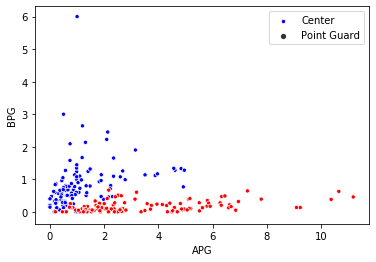

In [74]:
c=pgc[pgc['Pos']=='C']
pg=pgc[pgc['Pos']=='PG']
sns.scatterplot(c['APG'],c['BPG'],color='b',size=150)
sns.scatterplot(pg['APG'],pg['BPG'],color='r',size=150)
plt.legend(['Center','Point Guard'])

In [76]:
from sklearn.cluster import KMeans
clut=KMeans(n_clusters=2, random_state=42)

In [77]:
clut.fit(pgc[['APG','BPG']])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [78]:
clut.cluster_centers_

array([[1.29036682, 0.54937702],
       [5.6164887 , 0.3483313 ]])

In [79]:
clut.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0])

In [82]:
labels=['C' if i==0 else 'PG' for i in clut.labels_ ]
labels

['C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'PG',
 'PG',
 'C',
 'C',
 'C',
 'PG',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'PG',
 'PG',
 'C',
 'C',
 'C',
 'PG',
 'PG',
 'PG',
 'C',
 'PG',
 'C',
 'C',
 'C',
 'C',
 'PG',
 'C',
 'C',
 'PG',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'PG',
 'C',
 'C',
 'C',
 'PG',
 'C',
 'PG',
 'PG',
 'C',
 'C',
 'C',
 'C',
 'PG',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'PG',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'PG',
 'PG',
 'C',
 'PG',
 'C',
 'C',
 'PG',
 'C',
 'C',
 'C',
 'PG',
 'C',
 'PG',
 'PG',
 'PG',
 'C',
 'PG',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'PG',
 'C',
 'PG',
 'PG',
 'C',
 'C',
 'C',
 'C',
 'C',
 'PG',
 'C',
 'C',
 'C',
 'C',
 'C',
 'PG',
 'C',
 'C',
 'PG',
 'C',
 'C',
 'PG',
 'C',
 'C',
 'C',
 'PG',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'PG',
 'PG',
 'C',
 'C',
 'C',
 'PG',
 'C',
 'C',
 'P

In [84]:
pgc['Label']=labels
pgc.head(20)

,Player,Pos,BPG,APG,Label
Column1,,,,,
24100,Steven Adams,C,0.975000,1.075000,C
24102,Alexis Ajinca,C,0.564103,0.307692,C
24103,Cole Aldrich,C,0.370968,0.403226,C
24108,Chris Andersen,C,0.583333,0.416667,C
24117,Joel Anthony,C,0.315789,0.157895,C
24120,Omer Asik,C,0.322581,0.483871,C
24121,D.J. Augustin,PG,0.012821,2.679487,C
24124,Wade Baldwin,PG,0.212121,1.848485,C
24126,J.J. Barea,PG,0.028571,5.514286,PG


In [85]:
pgc.shape

(226, 5)

In [87]:
sum(pgc['Label']==pgc['Pos'])/len(pgc)

0.6592920353982301

In [89]:
#for knn and logistics regrr take array like input
x=pgc[['APG','BPG']].values
y=pgc['Pos'].values


array(['C', 'C', 'C', 'C', 'C', 'C', 'PG', 'PG', 'PG', 'PG', 'C', 'C',
       'C', 'PG', 'C', 'C', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'C', 'PG',
       'C', 'C', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'C', 'C', 'C',
       'PG', 'PG', 'C', 'C', 'C', 'PG', 'PG', 'PG', 'PG', 'PG', 'C', 'PG',
       'C', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'C', 'PG', 'PG', 'PG',
       'PG', 'PG', 'C', 'PG', 'PG', 'PG', 'C', 'C', 'PG', 'C', 'C', 'PG',
       'C', 'C', 'PG', 'C', 'PG', 'PG', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'PG', 'PG', 'C', 'C', 'C', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'C',
       'PG', 'PG', 'PG', 'PG', 'C', 'C', 'PG', 'C', 'C', 'C', 'C', 'PG',
       'C', 'PG', 'C', 'PG', 'PG', 'PG', 'C', 'C', 'C', 'C', 'PG', 'PG',
       'PG', 'C', 'C', 'C', 'PG', 'C', 'C', 'PG', 'C', 'C', 'PG', 'PG',
       'C', 'PG', 'PG', 'PG', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'PG', 'PG', 'PG', 'PG', 'PG',
       'PG', 'PG', 'C', 'C', 'C', 'C', 'C', '

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
logr=LogisticRegression()

In [96]:
logr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
pred=logr.predict(x_test)
pred

array(['PG', 'C', 'PG', 'PG', 'C', 'C', 'PG', 'C', 'PG', 'PG', 'C', 'C',
       'PG', 'C', 'PG', 'PG', 'PG', 'PG', 'C', 'C', 'C', 'PG', 'C', 'PG',
       'PG', 'C', 'PG', 'C', 'PG', 'PG', 'PG', 'PG', 'PG', 'C', 'C', 'C',
       'C', 'C', 'PG', 'C', 'C', 'PG', 'C', 'C', 'C', 'C', 'PG', 'C',
       'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'C', 'C', 'C'], dtype=object)

In [98]:
#there is a score func directly from logis regrr which can be used to calculate the correct rate
logr.score(x_test,y_test)

0.9824561403508771

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn=KNeighborsClassifier(n_neighbors=7)

In [112]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [113]:
pred=knn.predict(x_test)
pred

array(['PG', 'C', 'PG', 'PG', 'C', 'C', 'PG', 'C', 'PG', 'PG', 'C', 'C',
       'PG', 'C', 'PG', 'PG', 'PG', 'PG', 'C', 'C', 'C', 'PG', 'C', 'PG',
       'PG', 'C', 'PG', 'C', 'PG', 'C', 'PG', 'PG', 'PG', 'C', 'C', 'C',
       'C', 'C', 'PG', 'C', 'C', 'PG', 'C', 'C', 'C', 'C', 'PG', 'C',
       'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'C', 'C', 'C'], dtype=object)

In [114]:
knn.score(x_test,y_test)

1.0